In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [88]:
img = cv2.imread('photo1.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

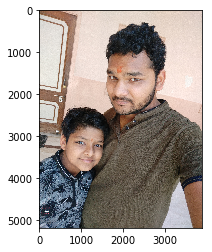

In [89]:
plt.imshow(img,cmap='gray')
plt.show()

In [90]:
eyes_cascade = cv2.CascadeClassifier('frontalEyes35x16.xml')

In [91]:
eyes = eyes_cascade.detectMultiScale(img,1.005,50,maxSize=(1000,1000),minSize=(100,100))
print(eyes)

[[1258 2695  120  261]
 [ 743 2954  410  896]]


In [92]:
#eyes_cascade.detectMultiScale?

In [93]:
# Making rectangle across each eye
#for eye in eyes:
 #   x,y,w,h = eye
  #  print(x,y,w,h)
   # cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),10)
#plt.imshow(img)

#### eyes_cascade.detectMultiScale
scaleFactor – Parameter specifying how much the image size is reduced at each image scale.

Basically the scale factor is used to create your scale pyramid. More explanation can be found here. In short, as described here, your model has a fixed size defined during training, which is visible in the xml. This means that this size of face is detected in the image if present. However, by rescaling the input image, you can resize a larger face to a smaller one, making it detectable by the algorithm.

1.05 is a good possible value for this, which means you use a small step for resizing, i.e. reduce size by 5%, you increase the chance of a matching size with the model for detection is found. This also means that the algorithm works slower since it is more thorough. You may increase it to as much as 1.4 for faster detection, with the risk of missing some faces altogether.

minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.

This parameter will affect the quality of the detected faces. Higher value results in less detections but with higher quality. 3~6 is a good value for it.

maxSize – Maximum possible object size. Objects bigger than this are ignored.

In [94]:
#eyes_cascade.detectMultiScale?

In [95]:
x,y,w,h = eyes[0]
print(x,y,w,h)

1258 2695 120 261


In [96]:
glasses = cv2.imread("sunglasses.jpg")
print(glasses.shape)


(350, 700, 3)


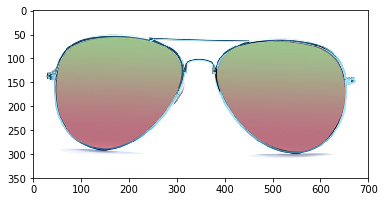

In [97]:
#plt.imshow(glasses)
plt.imshow(glasses)


In [98]:
#cv2.resize?

In [99]:
#cv2.imshow?

In [100]:
for eye in eyes:
    x,y,w,h = eye
    glasses = cv2.imread("sunglasses.jpg")

    glasses = cv2.cvtColor(glasses,cv2.COLOR_RGB2BGR)
    glasses = cv2.resize(glasses,(3*w,int(h/2))) # width is multiplied by 2 since classifier will recognize only single eye.
    for c in range(3):
        for a in range(glasses.shape[0]):
            for b in range(glasses.shape[1]):
                if glasses[a][b][0]!=255 or glasses[a][b][1]!=255 or glasses[a][b][2]!=255: # To remove the white part in glasses
                    img[y+a][x+b][c] = glasses[a][b][c]

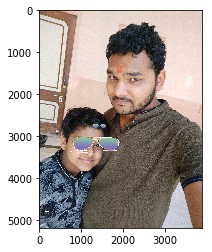

In [101]:
plt.imshow(img)

### Our algo cannot predict all values correctly but upto certain accuracy.

In [102]:
print(glasses.shape)

(448, 1230, 3)


In [103]:
print(x,y,w,h)

743 2954 410 896


In [104]:
print(glasses[4][5][2])

255


(5184, 3880, 3)


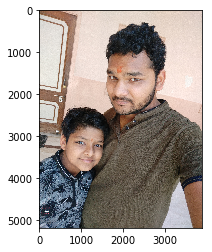

In [105]:
imag = cv2.imread("photo1.jpg")
imag = cv2.cvtColor(imag,cv2.COLOR_RGB2BGR)
print(imag.shape)
plt.imshow(imag)



(400, 500, 3)


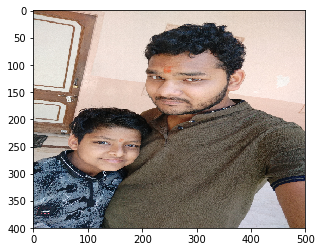

In [106]:
imag_rs = cv2.resize(imag,(500,400))
print(imag_rs.shape)
plt.imshow(imag_rs)

In [86]:
h=2.5
int(h/2)

1